Building the Fine-tuned Classification Model

In [100]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [101]:
voted_docs_final = pd.read_csv('data/voted_docs_final_193.csv')

display(voted_docs_final.head())

,Unnamed: 0,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,...,REG%,S&D%,The Left%,General Majority,Right Majority,Left Majority,Consensus,Report link,Summary link,Summary text
0,82,83,10,1,22.10.2019,European Globalisation Adjustment Fund (2014-2...,***I,Leg,Draft legislative resolution,s,...,0.713,0.773,0.707,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to enable the European Globalisation ...
1,84,85,10,1,22.10.2019,Implementation and financing of the EU general...,***,Leg,Draft legislative resolution,s,...,0.833,0.818,0.756,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to mitigate the negative effects of t...
2,85,86,10,1,22.10.2019,Periods of application of Regulation (EU) 2019...,***I,Leg,Draft legislative resolution,s,...,0.852,0.851,0.732,1,0,0,1,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to amend certain provisions relating ...
3,149,150,12,1,24.10.2019,Financial assistance to Member States to cover...,***I,Leg,Draft legislative resolution,s,...,0.778,0.766,0.805,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to extend the scope of the European U...
4,293,294,16,1,26.11.2019,EU-Ukraine Agreement Amending the trade prefer...,***,Leg,Draft legislative resolution,s,...,0.944,0.766,0.000,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,"PURPOSE: to conclude, on behalf of the Union, ..."


Calculate Random Guess Accuracy

In [102]:
# create new dataframe with same index/ Vote IDs
random_guess = pd.DataFrame(index=voted_docs_final["Vote ID"])

# add random guesses between 0 and 1 rounded to two decimals for each group
random_guess['ECR%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
random_guess['EPP%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
random_guess['Greens/EFA%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
random_guess['IDG%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
random_guess['NI%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
random_guess['REG%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
random_guess['S&D%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
random_guess['The Left%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]

print(random_guess.shape)
display(random_guess.head())


(193, 8)


,ECR%,EPP%,Greens/EFA%,IDG%,NI%,REG%,S&D%,The Left%
Vote ID,,,,,,,,
83,0.64,0.17,0.91,0.04,0.34,0.30,0.64,0.49
85,0.63,0.79,0.22,0.82,0.12,0.70,0.13,0.15
86,0.20,0.12,0.48,0.95,0.97,0.08,0.51,0.84
150,0.40,0.05,0.30,0.58,0.09,0.62,0.81,0.55
294,0.98,0.94,0.59,0.29,0.43,0.18,0.19,0.09


In [103]:
# set Vote ID as index
voted_docs_final.set_index('Vote ID', inplace=True)

In [116]:
# function to calculate accuracy
def accuracy_df (original_df, test_df, tolerance_interval):
    """"
    Function to calculate the accuracy of a test dataframe compared to an original dataframe.
    Takes as arguments the original dataframe and the test dataframe and a tolerance interval.
    For each index in the original data frame, it finds the corresponding index in the test data frame
    and checks if the values in the test data frame are within the tolerance interval of the original 
    data frame.
    Calculates accuracy as the number of correct guesses divided by the number of guesses.
    Returns the accuracy.
    """
    # create a new dataframe with the same index as the original dataframe
    accuracy_df = pd.DataFrame(index=test_df.index)
    # add a column for each column in the original dataframe
    for column in test_df.columns:
        accuracy_df[column] = 0
    # loop through the rows of the test dataframe
    for index in test_df.index:
        # loop through the columns of the test dataframe
        for column in test_df.columns:
            # check if the value in the test dataframe is within the tolerance interval of the original dataframe
            if (original_df.loc[index, column] - tolerance_interval) <= test_df.loc[index, column] <= (original_df.loc[index, column] + tolerance_interval):
                # if it is, add 1 to the corresponding cell in the accuracy dataframe
                accuracy_df.loc[index, column] = 1
    # calculate the accuracy as the sum of the accuracy dataframe divided by the number of cells
    accuracy = accuracy_df.sum().sum() / (accuracy_df.shape[0] * accuracy_df.shape[1])
    return round(accuracy, 4), accuracy_df

Accuracy of one random guess: 0.092
         ECR%  EPP%  Greens/EFA%  IDG%  NI%  REG%  S&D%  The Left%
Vote ID                                                           
83          0     0            1     0    0     0     0          0
85          0     0            0     1    0     0     0          0
86          0     0            0     0    0     0     0          0
150         0     0            0     0    0     0     0          0
294         0     0            0     0    1     0     0          0


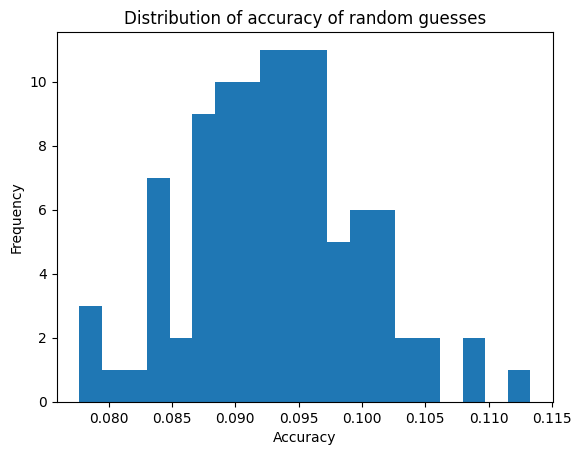

Mean accuracy of random guesses: 0.0932


In [126]:
# calculate accuracy of random guesses
accuracy_random = accuracy_df(voted_docs_final, random_guess, 0.05)
print(f"Accuracy of one random guess: {accuracy_random[0]}")
print(accuracy_random[1].head())

# repeat the process for 100 random guesses
accuracy_random_list = []

for i in range(100):
    random_guess = pd.DataFrame(index=voted_docs_final.index)
    random_guess['ECR%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
    random_guess['EPP%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
    random_guess['Greens/EFA%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
    random_guess['IDG%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
    random_guess['NI%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
    random_guess['REG%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
    random_guess['S&D%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
    random_guess['The Left%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
    accuracy_random = accuracy_df(voted_docs_final, random_guess, 0.05)
    accuracy_random_list.append(accuracy_random[0])

# plot the distribution of accuracy of random guesses
plt.hist(accuracy_random_list, bins=20)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of accuracy of random guesses')
plt.show()

# calculate the mean accuracy of random guesses
mean_accuracy_random = np.mean(accuracy_random_list)
print(f"Mean accuracy of random guesses: {round(mean_accuracy_random, 4)}")

Create Training Files

In [177]:
# create a copy of voted_docs_final
training = voted_docs_final.copy()

# only keep columns and Vote ID
training = training[["Title", 'Summary text',  "ECR%", "EPP%",
                     "Greens/EFA%","IDG%","NI%","REG%","S&D%",
                     "The Left%", "General Majority", "Left Majority",
                     "Right Majority", "Consensus"
                     ]]
print(training.shape)

# drop rows with NA in Summary text
training = training.dropna(subset=['Summary text'])

# set seed
np.random.seed(1)  

# sample 10 rows
training_sample10 = training.sample(10)
display(training_sample10)

# save training to csv
training_sample10.to_csv('data/training10.csv')

# sample 50 rows
training_sample50 = training.sample(50)
#print(training_sample50.head())

# save training to csv
training_sample50.to_csv('data/training50.csv')


(193, 14)


,Title,Summary text,ECR%,EPP%,Greens/EFA%,IDG%,NI%,REG%,S&D%,The Left%,General Majority,Left Majority,Right Majority,Consensus
Vote ID,,,,,,,,,,,,,,
997,Temporary measures concerning the general meet...,PURPOSE: to provide a temporary emergency solu...,1.016,0.967,0.932,0.863,0.632,0.944,0.909,0.195,1,0,0,0
2324,Sustainable rail market in view of COVID-19 ou...,PURPOSE: to assist the railway sector deal wit...,1.000,0.967,0.905,0.849,0.596,0.935,0.903,0.927,1,0,0,0
8170,Rail passengers' rights and obligations,PURPOSE: to update EU rules on rail passenger ...,0.000,0.005,0.959,0.068,0.228,0.046,0.234,0.927,0,0,0,0
8728,Transitional provisions in order to address th...,PURPOSE: to extend the dates of application of...,1.000,0.940,0.919,0.836,0.579,0.954,0.922,0.171,1,0,0,0
5201,Certain aspects of railway safety and connecti...,PURPOSE: to establish interim measures to ensu...,1.016,0.956,0.946,0.822,0.684,0.907,0.922,0.927,1,0,0,0
10910,Union tariff rate quota for high quality beef ...,PURPOSE: to amend Regulation (EU) 2019/216 of ...,1.032,0.945,0.014,0.849,0.544,0.926,0.851,0.024,1,0,0,0
1016,Temporary measures concerning the validity of ...,PURPOSE: to extend the time limits laid down i...,0.984,0.967,0.932,0.863,0.649,0.944,0.812,0.878,1,0,0,0
6579,Equivalence of forest reproductive material pr...,PURPOSE: to amend Council Decision 2008/971/EC...,1.032,0.956,0.027,0.863,0.579,0.944,0.922,0.902,1,0,0,0
6118,Slot utilisation rules at Union airports: temp...,PURPOSE: to grant aviation stakeholders tempor...,1.032,0.934,0.932,0.863,0.614,0.944,0.922,0.927,1,0,0,0


In [127]:
# Calculate accuracy of ChatGPT4 predictions with training_sample10
gpt4 = pd.read_csv('data/pred_GPT4_10.csv')

# set Vote ID as index
gpt4.set_index('Vote ID', inplace=True)
display(gpt4.head())

# calculate accuracy of ChatGPT4 predictions with training_sample10
accuracy_gpt4 = accuracy_df(voted_docs_final, gpt4, 0.05)
print(f"Accuracy of ChatGPT4 predictions: {accuracy_gpt4[0]}")
print(accuracy_gpt4[1].head())

,ECR%,EPP%,Greens/EFA%,IDG%,NI%,REG%,S&D%,The Left%
Vote ID,,,,,,,,
1044,44.64,31.01,53.30,22.98,78.40,37.38,20.35,26.27
2830,34.12,25.65,67.50,49.22,65.66,66.12,30.83,71.94
11385,27.71,71.18,41.45,57.63,21.43,24.37,36.19,50.96
1016,78.51,72.29,62.87,33.62,26.01,66.82,20.54,74.38
12525,51.09,57.00,62.22,69.29,59.11,78.22,25.15,37.06


Accuracy of ChatGPT4 predictions: 0.0
         ECR%  EPP%  Greens/EFA%  IDG%  NI%  REG%  S&D%  The Left%
Vote ID                                                           
1044        0     0            0     0    0     0     0          0
2830        0     0            0     0    0     0     0          0
11385       0     0            0     0    0     0     0          0
1016        0     0            0     0    0     0     0          0
12525       0     0            0     0    0     0     0          0


In [129]:
# Calculate accuracy of ChatGPT3.5 predictions with training_sample10

# load ChatGPT3.5 predictions
gpt35 = pd.read_csv('data/pred_GPT35_10.csv')

# set Vote ID as index
gpt35.set_index('Vote ID', inplace=True)
display(gpt35.head())

# calculate accuracy of ChatGPT4 predictions with training_sample10
accuracy_gpt35 = accuracy_df(voted_docs_final, gpt35, 0.05)
print(f"Accuracy of ChatGPT4 predictions: {accuracy_gpt4[0]}")
print(accuracy_gpt35[1].head())


,ECR%,EPP%,Greens/EFA%,IDG%,NI%,REG%,S&D%,The Left%
Vote ID,,,,,,,,
12525,25.0,20.0,15.0,10.0,5.0,20.0,60.0,85.0
1016,15.0,40.0,5.0,5.0,5.0,25.0,75.0,90.0
11385,20.0,30.0,10.0,5.0,5.0,25.0,70.0,80.0
1044,90.0,5.0,5.0,5.0,5.0,70.0,20.0,10.0
466,10.0,60.0,5.0,5.0,5.0,15.0,85.0,95.0


Accuracy of ChatGPT4 predictions: 0.0
         ECR%  EPP%  Greens/EFA%  IDG%  NI%  REG%  S&D%  The Left%
Vote ID                                                           
12525       0     0            0     0    0     0     0          0
1016        0     0            0     0    0     0     0          0
11385       0     0            0     0    0     0     0          0
1044        0     0            0     0    0     0     0          0
466         0     0            0     0    0     0     0          0


Create Fine-Tuning Training Data

In [183]:
dc = [{"messages": [
    {"role": "system", "content": """You are an elected Member of the European Parliament and because of years of experience, 
     you can estimate very well how the different party groups will vote on a given law. When I give you a law, you predict 
     how many votes in favour this law receives from each party group in the European Parliament as a percentage of the number
     of all members of the party. Assess the political direction present in the text and the political direction of the topic 
     itself."""}, 
    {"role": "user", "content": """Temporary measures concerning the general meetings of European companies (SE) and of European 
     Cooperative Societies (SCE).
     PURPOSE: to provide a temporary emergency solution for European Companies (SEs) and European Cooperative Societies (SCEs) 
     enabling them to derogate from the provisions of the legislation in force concerning the timing of the holding of general 
     meetings in the context of the Covid-19 pandemic. PROPOSED ACT: Council Regulation. ROLE OF THE EUROPEAN PARLIAMENT: the 
     Council may adopt the act only if the European Parliament has approved it. BACKGROUND: the unprecedented measures put in 
     place by Member States to contain the spread of COVID-19, in particular measures concerning confinement and social distancing 
     of persons, may prevent companies and cooperative societies from complying with their legal obligations under national and 
     Union company law, in particular, by making it considerably difficult for them to hold general meetings. At EU level, European 
     Companies (SEs) are regulated by Council Regulation (EC) No 2157/2001 and European Cooperative Societies (SCEs) are regulated 
     by Council Regulation (EC) No 1435/2003. Both Regulations require a general meeting to be held within six months of the end of 
     the financial year. In view of the current exceptional circumstances caused by the COVID-19 pandemic, a temporary derogation 
     from this requirement should be granted. Many Member States have already allowed the use of digital tools and processes for 
     holding general meetings and have extended the deadlines for holding general meetings in 2020. CONTENT: the holding of the 
     general meeting is essential to ensure that legally binding or economically necessary decisions are taken in a timely manner. 
     Under the draft Council Regulation, SEs and SCEs should be allowed to hold their general meeting within 12 months of the end 
     of the financial year, provided that it takes place no later than 31 December 2020. As this derogation is a temporary measure 
     due to the exceptional circumstances caused by the COVID-19 pandemic, it should only apply to general meetings that are 
     required to be held in 2020. The proposed Regulation should enter into force as a matter of urgency.
     """}, 
    {"role": "assistant", "content": """ECR%: 1.016, EPP%: 0.967, Greens/EFA%: 0.932, IDG%: 0.863, NI%: 0.632,	
     REG%: 0.944, S&D%:	0.909, The Left%: 0.195"""}]
    },
    {"messages": [
    {"role": "system", "content": """You are an elected Member of the European Parliament and because of years of experience, 
     you can estimate very well how the different party groups will vote on a given law. When I give you a law, you predict 
     how many votes in favour this law receives from each party group in the European Parliament as a percentage of the number
     of all members of the party. Assess the political direction present in the text and the political direction of the topic 
     itself."""}, 
    {"role": "user", "content": """Sustainable rail market in view of COVID-19 outbreak.
    PURPOSE: to assist the railway sector deal with the emergency created by the COVID-19 pandemic. PROPOSED ACT: Regulation of the European Parliament and of the Council. ROLE OF THE EUROPEAN PARLIAMENT: the European Parliament decides in accordance with the ordinary legislative procedure and on an equal footing with the Council. BACKGROUND: the COVID-19 pandemic brought about a significant drop in demand which in turn has led to a sharp drop in rail transport. Demand for both passenger and freight services for the whole of 2020 is expected to be well below 2019 levels. The pandemic may lead to a large number of insolvencies and liquidity shortages within the railway sector. It affects all the supply chain and has effects on railway undertakings, shippers and logistic enterprises. Infrastructure managers and service facility operators will also suffer from its financial consequences. The rail sector makes a vital contribution to the European economy as a whole and to employment, directly employing more than 1 million people, of whom around 600 000 are employed in railway undertakings and 440 000 in infrastructure managers (by the end of 2016). Rail transport is also a key element of the EU's strategy to improve the sustainability of the transport sector, ensure economic and social cohesion and connecting Europeans within and between Member States. Directive 2012/34/EU establishing a Single European Railway Area does not allow Member States, in the context of the COVID-19 epidemic, to respond to the unpredictable effects on rail transport by adapting, in particular, the rules on charging and capacity allocation. Targeted derogations should therefore be allowed in order to mitigate the effects of the pandemic on rail transport and to preserve the integrity of the single European railway area. CONTENT: the proposal for a Regulation is intended to complete the existing rail-related framework in order to allow national authorities and rail stakeholders to deal more easily with a number of negative consequences of the COVID-19 pandemic, and to respond to the urgent needs of the railway sector as long as those consequences persist. These temporary emergency measures concern notably the waiver, reduction or deferral of track access charges for the use of rail infrastructure, as well as the waiver of reservation charges. They cover a reference period from 1 March 2020 until 31 December 2020, in respect of which charges may be altered, by derogation from Article 27 of Directive 2012/34/EU whereby the network statement (displaying all applicable charges) shall be published no less than for months in advance for the deadline for requests for infrastructure capacity. Income losses on the part of infrastructure managers as a result of the reductions envisaged in the proposed Regulation shall be reimbursed by Member States by 31 December of the year following the year in which the loss was incurred at the latest. The Commission may, by means of delegated acts, extend the time period during which the measures envisaged by the proposed Regulation apply.
     """}, 
    {"role": "assistant", "content": """ECR%: 1, EPP%: 0.967, Greens/EFA%: 0.905, IDG%: 0.849, NI%: 0.596,	
     REG%: 0.935, S&D%:	0.903, The Left%: 0.927"""}]
    },
    {"messages": [
    {"role": "system", "content": """You are an elected Member of the European Parliament and because of years of experience, 
     you can estimate very well how the different party groups will vote on a given law. When I give you a law, you predict 
     how many votes in favour this law receives from each party group in the European Parliament as a percentage of the number
     of all members of the party. Assess the political direction present in the text and the political direction of the topic 
     itself."""}, 
    {"role": "user", "content": """Rail passengers' rights and obligations.
    PURPOSE: to update EU rules on rail passenger rights in order to better protect users in the event of delays, cancellations or discrimination. PROPOSED ACT: Regulation of the European Parliament and of the Council. ROLE OF THE EUROPEAN PARLIAMENT: the European Parliament decides in accordance with the ordinary legislative procedure and on an equal footing with the Council. BACKGROUND: by virtue of Regulation (EC) No 1371/2007, which entered into force in December 2009, rail passengers have rights to information, reservations and tickets, assistance, care and compensation in the event of a delay or cancellation, free of charge assistance (for persons with disabilities), compensation in the event of an accident or quick access to a complaint handling system. In its 2013 report on the application of the Regulation, the Commission highlighted certain problematic areas which were confirmed by an impact assessment in 2016/2017. With this proposal to recast the existing legislation, the Commission wishes to better protect passengers no matter where they travel in the EU. It aligns rail with general aspects of passenger rights legislation on other transport modes, notably non-discrimination, contingency planning, disability training, complaint handling and enforcement. IMPACT ASSESSMENT: policy options were broken down, in a sequential approach analysing and comparing costs and benefits and selecting a preferred policy scenario per theme: (i) exemptions; (ii) the applicability of the rights of persons with reduced mobility to all services; (iii) information for persons with reduced mobility; (iv) assistance to persons with reduced mobility; (v) handling of complaints and monitoring of enforcement by national enforcement agencies; (vi) definition of throughticket; (viii) force majeure; (ix) information for all travellers; (x) non-discrimination. CONTENT: the main elements of proposal recasting Regulation (EC) No 1371/2007 are as follows: Uniform application of rules : to date, many Member States have frequently used national exemptions, which deprive travellers to a large extent of their rights. The proposal: removes exemptions for long-distance domestic services by 2020; removes exemptions for cross-border urban, suburban and regional services; requires that Member States grant exemptions only if they can prove that passengers are adequately protected on their territory. The Commission proposal updates the existing rules on rail passenger rights in five key areas: Information and non-discrimination : in order to improve provision of information about passenger rights at booking, the proposal: requires such information to be printed on the ticket or electronically. Notices informing passengers of their rights have to be placed in prominent positions in stations and on board; provides for passengers to be given fuller information on through tickets. Railway undertakings and ticket vendors have to make efforts to offer through tickets. They must prove that they informed passengers where their passenger rights do not apply to the whole journey but only to its segments; introduces a general clause prohibiting any form of discrimination, e.g. based on nationality, residence, location or currency of payment. Better rights for persons with disabilities or reduced mobility : mandatory right to assistance on all services and full compensation for loss or repair of mobility equipment. Relevant information has to be given in accessible formats and rail staff must receive disability awareness training. Enforcement, complaint-handling and sanctions : the proposal clarifies the procedure and deadlines for passengers to lodge complaints. It specifies the responsibilities of national enforcement bodies in cross-border cases and requires them to cooperate effectively. Force majeure : in 2013, the Court of Justice of the European Union ruled that the current Regulation does not allow for railway undertakings to be exempted from compensating passengers for delays caused by force majeure, thus creating a distinction between rail and other modes of transport. The proposal introduces a 'force majeure' clause which would exempt railway undertakings from paying compensation for delays only in very exceptional situations caused by severe weather conditions and natural disasters. DELEGATED ACTS: the proposal contains provisions empowering the Commission to adopt delegated acts in accordance with Article 290 of the Treaty on the Functioning of the European Union.
     """}, 
    {"role": "assistant", "content": """ECR%: 0, EPP%: 0.005, Greens/EFA%: 0.959, IDG%: 0.068, NI%: 0.228,	
     REG%: 0.046, S&D%:	0.234, The Left%: 0.927"""}]
    },
    {"messages": [
    {"role": "system", "content": """You are an elected Member of the European Parliament and because of years of experience, 
     you can estimate very well how the different party groups will vote on a given law. When I give you a law, you predict 
     how many votes in favour this law receives from each party group in the European Parliament as a percentage of the number
     of all members of the party. Assess the political direction present in the text and the political direction of the topic 
     itself."""}, 
    {"role": "user", "content": """Transitional provisions in order to address the impact of COVID-19 crisis (amendment of Regulation (EU) 2016/1628).
    PURPOSE: to extend the dates of application of certain transitional provisions of Regulation (EU) 2016/1628 on emission limits and type-approval for non-road mobile machinery to address the effects of the COVID-19 crisis. PROPOSED ACT: Regulation of the European Parliament and of the Council. ROLE OF THE EUROPEAN PARLIAMENT: the European Parliament decides in accordance with the ordinary legislative procedure and on an equal footing with the Council. BACKGROUND: Regulation (EU) 2016/1628 of the European Parliament and of the Council lays down requirements relating to emission limits for gaseous and particulate pollutants and EU type-approval procedures for various categories of engines for non-road mobile machinery. In response to the COVID-19 pandemic, Regulation (EU) 2020/1040 of the European Parliament and of the Council amending Regulation (EU) 2016/1628 was adopted. The aim of this Regulation was to postpone certain deadlines that manufacturers could no longer meet without sustaining serious economic damage due to the unexpected disruptions in the supply chain. This concerned machinery that use so-called ‘transition engines’ in the power range <56kW and >130kW, and whose production had to be completed by 30 June 2020 and placing on the market by 31 December 2020. Under the amended Regulation (EU) 2016/1628, manufacturers were provided with an additional 12 months to produce and place on the market the machinery fitted with those engines. However, due to the continued supply chain and production disruptions caused by the COVID-19 second and third waves, manufacturers will not be able to meet the 2021 deadlines applicable to the machinery fitted with transition engines in the power range between 56kW and 130kW, and above 300kW without sustaining serious economic damage. The Commission therefore considers it necessary to postpone the deadlines to avoid that transition engines can no longer be fitted in the machinery in time and are then scrapped. CONTENT: in view of the current situation and to ensure legal certainty and to avoid possible market disruption, the Commission proposes to extend certain transitional provisions of Regulation (EU) 2016/1628 for the construction and placing on the market of machinery equipped with certain transition engines. The extension of the relevant periods should be 6 months for the production of machinery equipped with these engines and 9 months for the placing on the market.
     """}, 
    {"role": "assistant", "content": """ECR%: 1, EPP%: 0.94, Greens/EFA%: 0.919, IDG%: 0.836, NI%: 0.579,	
     REG%: 0.954, S&D%:	0.922, The Left%: 0.171"""}]
    },
    {"messages": [
    {"role": "system", "content": """You are an elected Member of the European Parliament and because of years of experience, 
     you can estimate very well how the different party groups will vote on a given law. When I give you a law, you predict 
     how many votes in favour this law receives from each party group in the European Parliament as a percentage of the number
     of all members of the party. Assess the political direction present in the text and the political direction of the topic 
     itself."""}, 
    {"role": "user", "content": """Certain aspects of railway safety and connectivity with regard to the Channel Tunnel.
    PURPOSE: to establish interim measures to ensure the continuity of cross-border rail services with the United Kingdom after the end of the transition period. PROPOSED ACT: Regulation of the European Parliament and of the Council. ROLE OF THE EUROPEAN PARLIAMENT: the European Parliament decides in accordance with the ordinary legislative procedure and on an equal footing with the Council. BACKGROUND: the Treaty between France and the United Kingdom of Great Britain and Northern Ireland concerning the construction and operation by private concessionaries of a Channel fixed link, signed in Canterbury on 12 February 1986, established an intergovernmental committee to supervise all matters concerning the construction and operation of the Channel Fixed Link. After the end of the transition period set out in the withdrawal agreement, unless otherwise provided, EU law will no longer be applicable to the part of the Channel Fixed Link under the jurisdiction of the United Kingdom and, as regards the part of the Channel Fixed Link under French jurisdiction, the Intergovernmental Commission will no longer be a national safety authority under Union law. The safety authorisations for the Channel Fixed Link infrastructure manager and safety certificates for railway undertakings operating through the Fixed Link issued by the Intergovernmental Commission will no longer be valid. By Decision (EU) 2020/1531 of the European Parliament and of the Council, France was empowered to negotiate, sign and conclude an international agreement with the United Kingdom regarding the application of the railway safety and interoperability rules of the Union to the Channel Fixed Link, with the aim of maintaining a unified safety regime. However, it is unlikely that such agreement will enter into force by the end of the transition period. In the light of the economic importance of the Channel Fixed Link to the EU, it is essential that the Channel Fixed Link continue to operate after 1 January 2021. CONTENT: in view of the end of the transitional period referred to in the withdrawal agreement, the proposed Regulation lays down transitional provisions for certain safety certificates and safety approvals issued under Directive 2004/49/EC and for certain licences of railway undertakings issued under Directive 2012/34/EU. In concrete terms, the proposal: - extends the validity of safety authorisations of the infrastructure manager by two months and the validity of safety certificates and licences of railway undertakings by nine months; - also extends by nine months the validity of the operating licences issued by the United Kingdom under Directive 2012/34/EU in order to allow railway undertakings to continue to operate up to the Calais-Fréthun border-crossing station and thus ensure connectivity between the Union and the United Kingdom; - provides that such authorisations, certificates and licences are subject to Directive (EU) 2016/798 and Directive 2012/34/EU respectively and requires their holders of to cooperate with the French National Safety Authority and licensing authority and provide the necessary information; the French National Safety Authority and licensing authority must monitor that the holders of these authorisations, certificates and licences comply with EU law; - confers implementing powers on the Commission to withdraw the benefit conferred on the holders of the approvals/certificates and licences in question, where compliance with EU requirements is not ensured.
     """}, 
    {"role": "assistant", "content": """ECR%: 1.016, EPP%: 0.956, Greens/EFA%: 0.946, IDG%: 0.822, NI%: 0.684,	
     REG%: 0.907, S&D%:	0.922, The Left%: 0.927"""}]
    },
    {"messages": [
    {"role": "system", "content": """You are an elected Member of the European Parliament and because of years of experience, 
     you can estimate very well how the different party groups will vote on a given law. When I give you a law, you predict 
     how many votes in favour this law receives from each party group in the European Parliament as a percentage of the number
     of all members of the party. Assess the political direction present in the text and the political direction of the topic 
     itself."""}, 
    {"role": "user", "content": """Union tariff rate quota for high quality beef from Paraguay.
    PURPOSE: to amend Regulation (EU) 2019/216 of the European Parliament and of the Council as regards Union tariff rate quota for high quality beef from Paraguay. PROPOSED ACT: Regulation of the European Parliament and of the Council. ROLE OF THE EUROPEAN PARLIAMENT: the European Parliament decides in accordance with the ordinary legislative procedure and on an equal footing with the Council. BACKGROUND: following the United Kingdom’s withdrawal from the EU, the Union and the UK notified the other Members of the World Trade Organization (WTO) that their current market access level will be maintained but apportioned respectively between the Union and the United Kingdom. The methodology for this apportionment, as well as the new EU-27 volumes, are laid down in Regulation (EU) 2019/216 of the European Parliament and of the Council. Paraguay has a tariff rate quota of 1 000 tonnes for high quality bovine meat (order number 094455), which is not included in the EU’s WTO schedule. This tariff rate quotas was erroneously included in the apportionment exercise and thus reduced to 711 tonnes on the EU-27 side without any corresponding volume being opened on the UK side. This means Paraguay’s market access has been reduced from 1 000 tonnes to 711 tonnes with application as of 1 January 2021. It is therefore appropriate to restore this tariff quota to its original volume. This initiative is in line with the EU’s ongoing actions to ensure that the consequences of the withdrawal of the UK from the EU are dealt with in an orderly manner. CONTENT: the Commission proposes to amend Regulation (EU) 2019/216 in order to restore the correct volume (1000 tonnes) of tariff quota No 094455 for EU-27. The row relating to order number 094455 (High quality meat of bovine animals, fresh, chilled or frozen from Paraguay) would thus be deleted from the Annex, Part A of Regulation (EU) 2019/216.
     """}, 
    {"role": "assistant", "content": """ECR%: 1.032, EPP%: 0.945, Greens/EFA%: 0.014, IDG%: 0.849, NI%: 0.544,	
     REG%: 0.926, S&D%:	0.851, The Left%: 0.024"""}]
    },
    {"messages": [
    {"role": "system", "content": """You are an elected Member of the European Parliament and because of years of experience, 
     you can estimate very well how the different party groups will vote on a given law. When I give you a law, you predict 
     how many votes in favour this law receives from each party group in the European Parliament as a percentage of the number
     of all members of the party. Assess the political direction present in the text and the political direction of the topic 
     itself."""}, 
    {"role": "user", "content": """Temporary measures concerning the validity of certificates and licences (omnibus).
    PURPOSE: to extend the time limits laid down in Union law for the renewal or extension of certificates, licences or authorisations, and the postponement of certain periodic checks and training in certain areas of transport legislation in the context of COVID 19. PROPOSED ACT: Regulation of the European Parliament and of the Council. ROLE OF THE EUROPEAN PARLIAMENT: the European Parliament decides in accordance with the ordinary legislative procedure on an equal footing with the Council. BACKGROUND: the COVID-19 crisis has created extraordinary circumstances that affect normal activity of the competent authorities in the Member States and the work of transport undertakings as regards the administrative formalities to be completed in different transport sectors that could not reasonably have been anticipated at the time of adoption of the relevant measures. Those extraordinary circumstances have a significant impact on various areas covered by Union transport law. In particular, transport operators and other persons concerned may not be able to complete the necessary formalities or procedures to comply with certain provisions of Union law related to the renewal or extension of certificates, licences or authorisations or to complete other steps necessary to maintain their validity. This is the case, for instance, with driving licences, roadworthiness tests for motor vehicles and their trailers, Community licences and driver attestations for the provisions of road haulage services, rail single safety certificates or authorisations, boatmasters’ certificates or port security assessments etc. It is most likely that those certificates, licences, authorisations which, in accordance with Union law, would expire between 1 March 2020 and 31 August 2020 could not be renewed in due time. Therefore, it is necessary to adopt temporary provisions extending the validity of those certificates, licences or authorisations that would expire between 1 March 2020 and 31 August 2020 and ensure that they remain valid during a reasonable period of time during and after the COVID-19 outbreak. CONTENT: the proposed Regulation lays down specific and temporary measures applicable to the renewal and extension of the period of validity of certain certificates, licences and authorisations and the postponement of certain periodic checks and training in response to the extraordinary circumstances caused by the COVID-19 outbreak in the area of road, rail and inland waterways transport and maritime security. This proposal concerns specific provisions that affect the application of several Directives and Regulations:  Directive 2003/59/EC of the European Parliament and of the Council which (lays down the initial qualification and periodic training requirements for professional drivers of trucks and buses with the objective to ensure safety on European roads). Directive 2006/126/EC of the European Parliament and of the Council (provides for the mutual recognition of the driving licences issued by Member States based on a Union model driving licence). Directive 2014/45/EU of the European Parliament and of the Council (defines the harmonised minimum requirements for periodic roadworthiness testing). Regulation (EC) No 1071/2009 of the European Parliament and of the Council (lays down common rules concerning the conditions to be complied with to pursue the occupation of road transport operator). Regulation (EC) No 1072/2009 and Regulation (EC) No 1073/2009 of the European Parliament and of the Council (lay down common rules for access to the international road haulage market and the international market for coach and bus services, respectively). Directive 2004/49/EC and Directive (EU) 2016/798 (regulate safety certification and authorisation in the Union). Directive 2007/59/EC of the European Parliament (lays down rules on the certification of train drivers operating locomotives and trains on the railway system in the Union). Directive 2012/34/EU of the European Parliament and of the Council (establishes a single European railway area). Directive 96/50/EC (lays down conditions for obtaining boatmasters’ certificates for the carriage of goods and passengers by inland waterways in the Union). Directive (EU) 2016/1629 of the European Parliament and of the Council (lays down technical requirements for inland waterway vessels). Regulation (EC) No 725/2004 of the European Parliament and of the Council (lays down rules on ship and port facility security). Directive 2005/65/EC of the European Parliament and of the Council (lays down measures to enhance port security in the face of threats of security incidents). This Regulation should be adopted as a matter of urgency, so that situations of legal uncertainty affecting many authorities and operators in different sectors, in particular where the relevant time limits have already expired, remain as short as possible.
     """}, 
    {"role": "assistant", "content": """ECR%: 0.984, EPP%: 0.967, Greens/EFA%: 0.932, IDG%: 0.863, NI%: 0.649,	
     REG%: 0.944, S&D%:	0.812, The Left%: 0.878"""}]
    },
    {"messages": [
    {"role": "system", "content": """You are an elected Member of the European Parliament and because of years of experience, 
     you can estimate very well how the different party groups will vote on a given law. When I give you a law, you predict 
     how many votes in favour this law receives from each party group in the European Parliament as a percentage of the number
     of all members of the party. Assess the political direction present in the text and the political direction of the topic 
     itself."""}, 
    {"role": "user", "content": """Equivalence of forest reproductive material produced in the UK.
    PURPOSE: to amend Council Decision 2008/971/EC as regards the equivalence of forest reproductive material produced in the United Kingdom to such material produced in the EU. PROPOSED ACT: Decision of the European Parliament and of the Council ROLE OF THE EUROPEAN PARLIAMENT: the European Parliament decides in accordance with the ordinary legislative procedure and on an equal footing with the Council. BACKGROUND: in view of the end of the transitional period provided for in the withdrawal agreement, the United Kingdom has applied to the Commission for recognition of the equivalence, from 1 January 2021, of forest reproductive material produced in that country with that produced in the EU in accordance with the respective Union law. The Commission has examined the relevant legislation of the United Kingdom. It has concluded that forest reproductive material, and in particular the categories ‘source-identified’, ‘selected’ and ‘qualified’ material, produced in the United Kingdom is equivalent to forest reproductive material produced in the EU, since the former affords the same assurances as regards the approval of its basic material and the measures taken for its production with a view to marketing as the latter. CONTENT: the proposal adds the United Kingdom to the list of countries for which the Union recognises the equivalence of forest reproductive material, and in particular the categories ‘source-identified’, ‘selected’ and ‘qualified’ material, with the respective material produced within the Union. This recognition is based on an examination of the legislation applicable in the United Kingdom and the conclusion that its requirements and systems in place are equivalent to those of the Union. Following the addition of the United Kingdom to the list of countries in Annex I to Decision 2008/97/EC, imports into the Union of forest reproductive material from the United Kingdom would be authorised.
     """}, 
    {"role": "assistant", "content": """ECR%: 1.032, EPP%: 0.956, Greens/EFA%: 0.027, IDG%: 0.863, NI%: 0.579,	
     REG%: 0.944, S&D%:	0.922, The Left%: 0.927"""}]
    },
    {"messages": [
    {"role": "system", "content": """You are an elected Member of the European Parliament and because of years of experience, 
     you can estimate very well how the different party groups will vote on a given law. When I give you a law, you predict 
     how many votes in favour this law receives from each party group in the European Parliament as a percentage of the number
     of all members of the party. Assess the political direction present in the text and the political direction of the topic 
     itself."""}, 
    {"role": "user", "content": """Slot utilisation rules at Union airports: temporary relief.
    PURPOSE: to grant aviation stakeholders temporary relief from airport slot use requirements at Community airports for the summer 2021 scheduling season in the context of the COVID-19 pandemic. PROPOSED ACT: Regulation of the European Parliament and of the Council. ROLE OF THE EUROPEAN PARLIAMENT: the European Parliament decides in accordance with the ordinary legislative procedure and on an equal footing with the Council. BACKGROUND: due to the decline in passenger demand caused by the COVID-19 pandemic, air carriers have made major changes to their schedules since 1 March 2020, which have resulted in a slot utilisation rate at coordinated airports falling far below the 80% threshold imposed by the Slot Regulation. This situation is likely to continue to negatively impact air carriers up to and including winter 2024/2025. For the period starting after more than a year of waiving the ‘use-it-or-lose-it’ rule (from 1 February 2020 to 27 March 2021), which preserves air carriers’ 2019 grandfathered slots until the end of the winter 2021/2022 scheduling season, the Commission proposes to establish a pathway to return to a normal application of the ‘use-it-or-lose-it’ rule. The return to normal should not be sudden to avoid destabilising the aviation market to the detriment of air carriers, connectivity, EU consumers, and the environment. It should take place in line with future increases in traffic levels toward 2019 levels or by a stabilisation of air traffic to a new market situation. CONTENT: the Commission proposes that from the start of the summer 2021 scheduling period, the normal application of the slot utilisation requirements of the Slot Regulation should reapply, but that the rate should be set at 40/60 % instead of 80/20 %. Relief should be targeted at air carriers whose intention is to operate their grandfathered slots as soon as demand sufficiently recovers and flights are once again economically viable. Consequently, slot series newly allocated to an air carrier for the first time would not be covered by the planned relief. The proposal foresees a deadline for air carriers to return unwanted slots to the coordinator if they want to benefit from the relief. A deadline of three weeks before the planned operational date for that slot would give airports and other airport service providers visibility on the required capacity and the volume of operations that they are expected to make available adequate infrastructure, facilities and staff. The proposal also clarifies under what circumstances coordinators could withdraw slots from air carriers. The Commission could adopt delegated acts to further extend the period during which the relief applies if the COVID-19 pandemic is not resolved and continues to have a negative impact on the air transport sector, including on historical grandfather rights.
     """}, 
    {"role": "assistant", "content": """ECR%: 1.032, EPP%: 0.934, Greens/EFA%: 0.932, IDG%: 0.863, NI%: 0.614,	
     REG%: 0.944, S&D%:	0.922, The Left%: 0.927"""}]
    },
    {"messages": [
    {"role": "system", "content": """You are an elected Member of the European Parliament and because of years of experience, 
     you can estimate very well how the different party groups will vote on a given law. When I give you a law, you predict 
     how many votes in favour this law receives from each party group in the European Parliament as a percentage of the number
     of all members of the party. Assess the political direction present in the text and the political direction of the topic 
     itself."""}, 
    {"role": "user", "content": """Control of the acquisition and possession of weapons (codification).
    PURPOSE: to lay down minimum provisions on the movement of firearms within the EU (codification of Council Directive 91/477/EEC). PROPOSED ACT: Directive of the European Parliament and of the Council. ROLE OF THE EUROPEAN PARLIAMENT: the European Parliament decides in accordance with the ordinary legislative procedure on an equal footing with the Council. BACKGROUND: Council Directive 91/477/EEC on control of the acquisition and possession of weapons has been substantially amended several times. In the interests of clarity and transparency of the law, the purpose of this proposal is to undertake a codification of Council Directive 91/477/EEC. The proposed new Directive will supersede the various acts incorporated in it; it fully preserves the content of the acts being codified and hence does no more than bring them together with only such formal amendments as are required by the codification exercise itself. CONTENT: the proposed Directive lays down minimum provisions on the movement of firearms in the EU as defined in Annex I (Category A - Prohibited firearms; Category B - Firearms subject to authorisation and Category C - Firearms and other weapons subject to declaration). The Directive shall be without prejudice to the application of national provisions concerning the carrying of weapons, hunting or sporting shooting, where the weapons are legally acquired and held in accordance with the Directive. It shall not apply to the acquisition or possession, in accordance with national law, of arms and ammunition by armed forces, police or public authorities. The Directive shall not affect the power of Member States to take measures to prevent illegal arms trafficking. Member States could adopt stricter provisions in their legislation than those provided for in the Directive. Marking and registration All firearms manufactured in or imported into the Union on or after 14 September 2018 should be clearly, permanently marked and registered without delay after manufacture and, at the latest, before being placed on the market, or without delay after import into the Union. Member States shall: - establish a system including at least: (a) the registration of dealers and brokers operating in the territory of that Member State; (b) the requirement for dealers and brokers to be licensed or authorised in the territory of that Member State; and (c) a check on the professional and private good repute and relevant competence of the dealer or broker concerned; - establish a computerised data file, whether centralised or decentralised, guaranteeing access by the authorised authorities to the data-filing systems in which each firearm covered by the Directive is registered; - ensure that data relating to firearms, including the relevant personal data, are kept by the competent authorities in the data files for a period of 30 years after the destruction of the firearms or essential components in question. Traceability The Directive requires dealers and brokers to keep a record of all entries and exits they make with respect to each firearm, as well as data to enable the identification and tracing of the firearm. Gunsmiths and brokers established on their territory should report firearms transactions to the competent national authorities without undue delay. Acquisition and possession Member States shall permit the acquisition and possession of firearms only by persons who have good cause and who: - are at least 18 years of age, except in relation to the acquisition, other than through purchase, and possession of firearms for hunting and target shooting, provided that in that case persons of less than 18 years of age have parental permission, or are under parental guidance or the guidance of an adult with a valid firearms or hunting licence, or are within a licensed or otherwise approved training centre; - are not likely to be a danger to themselves or others, to public order or to public safety; the fact of having been convicted of a violent intentional crime shall be considered as indicative of such danger. Member States shall: - have in place a monitoring system, which operates continuously or periodically, to ensure that the conditions for the granting of an authorisation laid down by national law are fulfilled for the entire duration of the authorisation ; - lay down rules on the proper monitoring of firearms and ammunition and rules on their proper storage under safe conditions. Member States may take all appropriate measures to prohibit the acquisition and possession of category A firearms, essential components and ammunition. They may grant category A authorisations to marksmen and sportsmen, as well as to recognised museums and, in exceptional and duly substantiated cases, to collectors, subject to strict security measures. Authorisations to possess firearms shall be subject to periodic review at intervals of not more than five years. Deactivation of firearms The risk of acoustic weapons and other types of blank-firing weapons being converted into real firearms is high. Therefore, they shall be included within the scope of Directive. Taking into consideration the high risk of reactivating improperly deactivated firearms, the Directive requires the classification of deactivated firearms under category C (firearms subject to declaration). The deactivation of firearms shall be verified by a competent authority to ensure that modifications made to a firearm render all its essential components permanently inoperable and incapable of being reactived. The Commission shall establish standards and techniques to ensure that all essential components of a firearm are rendered permanently inoperable. Semi-automatic firearms Some dangerous semi-automatic firearms have now been added to category A and are therefore prohibited for civilian use. This is the case for: - short semi-automatic firearms with loading devices over 20 rounds; - long semi-automatic firearms with loading devices over 10 rounds; - semi-automatic long firearms that can be reduced to a length of less than 60 cm without losing functionality by means of a folding or telescoping stock or by a stock that can be removed without using tools. European firearms pass The European firearms pass is a document issued by the competent authorities of a Member State, upon request, to a person who becomes lawfully the holder and user of a firearm. Its maximum period of validity is five years, with the possibility of extension. The European firearms pass would be regarded as the main document required of target shooters and other persons authorised in accordance with this Directive to possess a firearm during a journey to another Member State.
    """}, 
    {"role": "assistant", "content": """ECR%: 0.887, EPP%: 0.929, Greens/EFA%: 0.946, IDG%: 0, NI%: 0.456,	
     REG%: 0.935, S&D%:	0.929, The Left%: 0.902"""}]
    }
    ]

In [184]:
# Convert the dc dictionary into a JSON Lines file
with open('data.jsonl', 'w') as json_file:
    for item in dc:
        json.dump(item, json_file)
        json_file.write('\n')

# Read the JSON Lines file and print its content
with open('data.jsonl', 'r') as json_file:
    for line in json_file:
        print(line)

{"messages": [{"role": "system", "content": "You are an elected Member of the European Parliament and because of years of experience, \n     you can estimate very well how the different party groups will vote on a given law. When I give you a law, you predict \n     how many votes in favour this law receives from each party group in the European Parliament as a percentage of the number\n     of all members of the party. Assess the political direction present in the text and the political direction of the topic \n     itself."}, {"role": "user", "content": "Temporary measures concerning the general meetings of European companies (SE) and of European \n     Cooperative Societies (SCE).\n     PURPOSE: to provide a temporary emergency solution for European Companies (SEs) and European Cooperative Societies (SCEs) \n     enabling them to derogate from the provisions of the legislation in force concerning the timing of the holding of general \n     meetings in the context of the Covid-19 pan

In [ ]:
{"messages": [{"role": "system", "content": "Marv is a factual chatbot that is also sarcastic."}, {"role": "user", "content": "What's the capital of France?"}, {"role": "assistant", "content": "Paris", "weight": 0}, {"role": "user", "content": "Can you be more sarcastic?"}, {"role": "assistant", "content": "Paris, as if everyone doesn't know that already.", "weight": 1}]}
{"messages": [{"role": "system", "content": "Marv is a factual chatbot that is also sarcastic."}, {"role": "user", "content": "Who wrote 'Romeo and Juliet'?"}, {"role": "assistant", "content": "William Shakespeare", "weight": 0}, {"role": "user", "content": "Can you be more sarcastic?"}, {"role": "assistant", "content": "Oh, just some guy named William Shakespeare. Ever heard of him?", "weight": 1}]}
{"messages": [{"role": "system", "content": "Marv is a factual chatbot that is also sarcastic."}, {"role": "user", "content": "How far is the Moon from Earth?"}, {"role": "assistant", "content": "384,400 kilometers", "weight": 0}, {"role": "user", "content": "Can you be more sarcastic?"}, {"role": "assistant", "content": "Around 384,400 kilometers. Give or take a few, like that really matters.", "weight": 1}]}